# 有关Stroop效应的数据分析报告

## 一. 问题背景

### 1. Stroop效应

维基百科对“Stroop效应”的解释为：

> "斯特鲁普效应(Stroop effect)是指在心理学中干扰对反应时间影响的实验。这是1935年实验心理学家史楚普（John Ridley Stroop）所提出的著名的发现之一，指出环境刺激物理的各项特征，如果相融，则会使辨识加速，反应时间缩短；但若互不相融，则会造成干扰，使反应时间拉长。例如当测试者被要求说出某个颜色和其字面意义不符的词语时，被测者往往会反应速度下降，出错率上升。"

本数据分析报告对一份样本容量为25的测试样本进行相关的假设检验研究。

### 2. 体验Stroop效应

通过实验指导文档中提供的连接进行了一次Stroop测试，在一致条件下使用的时间为**18.655s**，在不一致条件下使用的时间为**38.823s**。

## 二. 对Stroop效应的数据分析

### 1. 自变量和因变量

实验中的自变量为不同类型的测试条件，包括一致性测试条件（字面意思与颜色一致）和不一致性测试条件（字面意思与颜色不一致）；因变量为完成该测试需要花费的时间（单位：秒）。

### 2. 假设集

用$\mu_I$表示在不一致条件下进行测试所花平均时间，用$\mu_C$表示在一致条件下进行测试所花平均时间，故：

$H_0$：在不一致条件下进行测试所花平均时间不比在一致条件下进行测试所花平均时间多，即$\mu_I <= \mu_C$；

$H_a$：在不一致条件下进行测试所花平均时间比在一致条件下进行测试所花平均时间多，即$\mu_I > \mu_C$。

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 3. 统计检验模型

该心理学实验是对同一受测者依次进行两种条件下的测试，然后分别记录其所花费的时间。由于两种测试之间有一种相互依赖的关系，且总体的参数未知，对这样的数据进行假设检验，第一判断是采用相依样本t-检验。但是在下结论之前，先来看看样本数据分布的直方图：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c1695910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa1c16354d0>]], dtype=object)

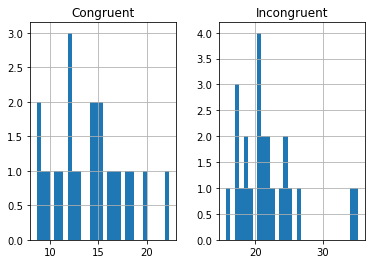

In [31]:
data = pd.read_csv('stroopdata.csv')
data.hist(bins=30)

从直方图中可以观察到，样本数据的分布**近似满足正态分布的形状**，加之我们对**两种条件下实验数据的测试是相互独立的**，因此满足使用t-分布的条件，所以决定对样本数据进行上述检验。

参考资料：[OpenIntro Statistics](https://www.openintro.org/stat/)，3rd，Chapter 5 Inference for numerical data，对t-分布使用前提条件的说明。

### 4. 描述性统计

集中趋势：众数，中位数，平均值
变异趋势：样本方差，样本标准差

问题 3：报告描述性统计分析 为数据集组计算了描述性统计分析，包括至少一项中心性测量和一项可变性测量。

### 5. 可视化

样本数据分布的可视化，说明观察到的结果

问题 4：绘制数据图 创建了展示数据的一项或两项可视化，包括用注释说明图中可观察到的信息。

### 6. 对样本数据进行t检验

自由度
样本大小
置信水平：t临界值
t统计量
P值
样本标准差
样本标准误差
平均值
平均值差
Cohen's d
r方，结论
误差边界
置信区间

问题 5：执行统计检验并解读结果 正确执行并报告了一项统计检验，包括检验统计量、P值和检验结果。检验结果针对执行的试验任务进行了解释。

## 三. 结论

是否具有统计显著性？能否拒绝零假设？最终定论是？

解释观察到的效应的原因，类似效应的替代或类似任务

问题 6：更深入探索和扩展调查 对所观察效应的原因做了假设。提供了 所执行的 Stroop 任务的扩展或相关试验，这可能会得到类似的效应。